In [63]:
%matplotlib inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Idea behind this research is to evaluate Long portfolio of mention 6 mutual funds, where we are: 
# a ) Cleaning and elaborating data
# b) Converting them between Datetime formats, Series and DataFrame 
# c) Building efficient Frontier according to 4 types of Weighting - MAX SHARPE, LOW VOL, MAX RETURN, EQUAL WEIGHT
# d) Using these specific weights to create 4 portfolios 
# e) Elaborating these 4 portfolios according to Maximum Drawdowns and VAR(Value at Risk) to compare worst case scenarios

# Amundi Funds 


# AF US PIONEER FUND
https://www.amundi.lu/retail/product/view/LU1883872332

# AF Strategic Income Fund  

https://www.amundi.lu/retail/product/view/LU2032056512

#  AF Global Equity Target Income
https://www.amundi.lu/retail/product/view/LU1883320993

#  AF Global Equity
https://www.amundi.lu/retail/product/view/LU1883342377

# AF GLOBAL ECOLOGY ESG
https://www.amundi.lu/retail/product/view/LU1883318740


# AF EUROPEAN EQUITY SMALL CAP 
https://www.amundi.lu/retail/product/view/LU1883306497




In [2]:
#Loading Historical Data downloaded from AMUNDI FUNDS website 22/08/2009-14/08/2019
#We are getting 8 identical documents in XLSX
US_PIONEER_FUND = pd.read_excel('AMUNDI FUNDS US PIONEER FUND.xlsx')
STRATEGIC_INCOME = pd.read_excel('AMUNDI FUNDS PIONEER STRATEGIC INCOME.xlsx')
GLOBAL_EQUITY = pd.read_excel('AMUNDI FUNDS PIONEER GLOBAL EQUITY.xlsx')
GLOBAL_EQUITY_TARGET_INCOME = pd.read_excel('AMUNDI FUNDS GLOBAL EQUITY TARGET INCOME.xlsx')
GLOBAL_ECOLOGY_ESG = pd.read_excel('AMUNDI FUNDS GLOBAL ECOLOGY ESG.xlsx')
EUROPEAN_EQUITY_SMALL_CAP = pd.read_excel('AMUNDI FUNDS EUROPEAN EQUITY SMALL CAP.xlsx')

asset_selection = ("US_PIONEER_FUND", "STRATEGIC_INCOME","GLOBAL_EQUITY", "GLOBAL_EQUITY_TARGET_INCOME","GLOBAL_ECOLOGY_ESG","EUROPEAN_EQUITY_SMALL_CAP")

In [3]:
#Starting with the US PIONEER FUND, which is the oldest, and building dataframe around this column
df = US_PIONEER_FUND

In [4]:
df.head(20)
#We can zee that all we need for dataframe is anything below 14th row, and Only Date column, that is in Unnamed :2 column and price
#that is in Unnamed: 3 section

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,RETURNS,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,Name of fund,AMUNDI FUNDS US PIONEER FUND - A EUR (C),NaN,NaN
6,NaN,Trída,C,NaN,NaN
7,NaN,ISIN code,LU1883872332,NaN,NaN
8,NaN,Benchmark,100% S&P 500 COMPOSITE,NaN,NaN
9,NaN,Reference currency,EUR,NaN,NaN


In [5]:
#Locking Dataframe with everything above 14th row to confirm
df1 = df.iloc[14:]

In [6]:
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
14,NaN,EUR,22/08/2009,100,100
15,NaN,EUR,23/08/2009,100,100
16,NaN,EUR,24/08/2009,100.62,99.81
17,NaN,EUR,25/08/2009,100.62,99.99
18,NaN,EUR,26/08/2009,100.62,100.7


In [7]:
df1_dates = df1["Unnamed: 2"]

In [8]:
df1_prices = df1["Unnamed: 3"]

In [9]:
#US PIONEER FUND DataFrame used as main page, where date is kept as a time stamp.
US_PIONEER_FUND = pd.concat([df1_dates, df1_prices],axis=1).rename(columns={'Unnamed: 3':'US_PIONEER_FUND','Unnamed: 2':'Date'}).reset_index(drop=True)

In [10]:
US_PIONEER_FUND = US_PIONEER_FUND.set_index('Date')

In [11]:
#Slice and Dice only needed columns, rename them 
STRATEGIC_INCOME_CLEAN = STRATEGIC_INCOME.iloc[14:,[2,4]].rename(columns={'Unnamed: 2':'time','Unnamed: 4':'STRATEGIC_INCOME'}).set_index('time')
GLOBAL_EQUITY_CLEAN = GLOBAL_EQUITY.iloc[14:,[2,4]].rename(columns={'Unnamed: 2':'time','Unnamed: 4':'GLOBAL_EQUITY'}).set_index('time')
GLOBAL_EQUITY_TARGET_INCOME_CLEAN = GLOBAL_EQUITY_TARGET_INCOME.iloc[14:,[2,3]].rename(columns={'Unnamed: 2':'time', 'Unnamed: 3':'GLOBAL_EQUITY_TARGET_INCOME'}).set_index('time')
GLOBAL_ECOLOGY_ESG_CLEAN = GLOBAL_ECOLOGY_ESG.iloc[14:,[2,3]].rename(columns={'Unnamed: 2':'time', 'Unnamed: 3':'GLOBAL_ECOLOGY_ESG'}).set_index('time')
EUROPEAN_EQUITY_SMALL_CAP_CLEAN = EUROPEAN_EQUITY_SMALL_CAP.iloc[14:,[2,3]].rename(columns={'Unnamed: 2':'time','Unnamed: 3':'EUROPEAN_EQUITY_SMALL_CAP'}).set_index('time')


In [12]:
#Joining all values in to 1 dataframe
DF_COMPLETE = US_PIONEER_FUND.join(STRATEGIC_INCOME_CLEAN).join(GLOBAL_EQUITY_CLEAN).\
                              join(GLOBAL_EQUITY_TARGET_INCOME_CLEAN).join(GLOBAL_ECOLOGY_ESG_CLEAN).\
                              join(EUROPEAN_EQUITY_SMALL_CAP_CLEAN)

In [13]:
DF_COMPLETE.head()


,US_PIONEER_FUND,STRATEGIC_INCOME,GLOBAL_EQUITY,GLOBAL_EQUITY_TARGET_INCOME,GLOBAL_ECOLOGY_ESG,EUROPEAN_EQUITY_SMALL_CAP
Date,,,,,,
22/08/2009,100,100,100,100,100,100
23/08/2009,100,100,100,100,100,100
24/08/2009,100.62,100.2,100.54,101.33,101.01,101.62
25/08/2009,100.62,100.32,100.75,101.53,100.63,101.77
26/08/2009,100.62,101.07,101.07,101.45,99.9,101.03


In [14]:
DF_COMPLETE.tail()
DF_PORTFOLIO1 = DF_COMPLETE

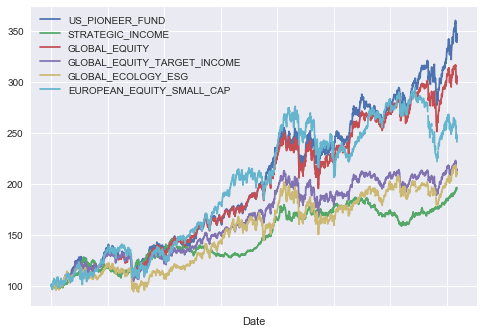

In [15]:
#ploting yet still in Price not Returns way
plt.style.use('seaborn')
DF_COMPLETE.plot()

In [16]:
# how manuy NaNs per column( we can see, that 3 of the funds are missing values )
DF_COMPLETE.isna().sum().sort_values()

US_PIONEER_FUND                 0
STRATEGIC_INCOME                0
GLOBAL_EQUITY                   0
EUROPEAN_EQUITY_SMALL_CAP      89
GLOBAL_EQUITY_TARGET_INCOME    94
GLOBAL_ECOLOGY_ESG             95
dtype: int64

In [17]:
DF_COMPLETE_RETS = DF_COMPLETE.pct_change()

In [18]:
DF_COMPLETE_RETS.head()

,US_PIONEER_FUND,STRATEGIC_INCOME,GLOBAL_EQUITY,GLOBAL_EQUITY_TARGET_INCOME,GLOBAL_ECOLOGY_ESG,EUROPEAN_EQUITY_SMALL_CAP
Date,,,,,,
22/08/2009,NaN,NaN,NaN,NaN,NaN,NaN
23/08/2009,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
24/08/2009,0.0062,0.002000,0.005400,0.013300,0.010100,0.016200
25/08/2009,0.0000,0.001198,0.002089,0.001974,-0.003762,0.001476
26/08/2009,0.0000,0.007476,0.003176,-0.000788,-0.007254,-0.007271


In [19]:
DF_COMPLETE_RETS.to_csv("AMUNDI_FUNDS_RE.csv")

In [20]:
DF_COMPLETE_RETS = pd.read_csv('AMUNDI_FUNDS_RE.csv')

In [21]:
DF_COMPLETE_RETS.head()

,Date,US_PIONEER_FUND,STRATEGIC_INCOME,GLOBAL_EQUITY,GLOBAL_EQUITY_TARGET_INCOME,GLOBAL_ECOLOGY_ESG,EUROPEAN_EQUITY_SMALL_CAP
0,22/08/2009,NaN,NaN,NaN,NaN,NaN,NaN
1,23/08/2009,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2,24/08/2009,0.0062,0.002000,0.005400,0.013300,0.010100,0.016200
3,25/08/2009,0.0000,0.001198,0.002089,0.001974,-0.003762,0.001476
4,26/08/2009,0.0000,0.007476,0.003176,-0.000788,-0.007254,-0.007271


In [22]:
# convert date to datetime and set date  as index

DF_COMPLETE_RETS['Date'] = pd.to_datetime(DF_COMPLETE_RETS['Date'], format='%d/%m/%Y')
DF_COMPLETE_RETS = DF_COMPLETE_RETS.set_index('Date')
DF_COMPLETE_RETS.head()

,US_PIONEER_FUND,STRATEGIC_INCOME,GLOBAL_EQUITY,GLOBAL_EQUITY_TARGET_INCOME,GLOBAL_ECOLOGY_ESG,EUROPEAN_EQUITY_SMALL_CAP
Date,,,,,,
2009-08-22,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-23,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-08-24,0.0062,0.002000,0.005400,0.013300,0.010100,0.016200
2009-08-25,0.0000,0.001198,0.002089,0.001974,-0.003762,0.001476
2009-08-26,0.0000,0.007476,0.003176,-0.000788,-0.007254,-0.007271


In [23]:
#Getting returns, annualising them and dropping NAs
returns_daily = DF_COMPLETE_RETS.dropna()
returns_annual = (DF_COMPLETE_RETS.mean() * 250).round(5)

In [24]:
print(str(np.round(returns_annual, 4) * 100) + '%')


US_PIONEER_FUND                9.32
STRATEGIC_INCOME               5.01
GLOBAL_EQUITY                  8.20
GLOBAL_EQUITY_TARGET_INCOME    5.88
GLOBAL_ECOLOGY_ESG             6.13
EUROPEAN_EQUITY_SMALL_CAP      7.34
dtype: float64%


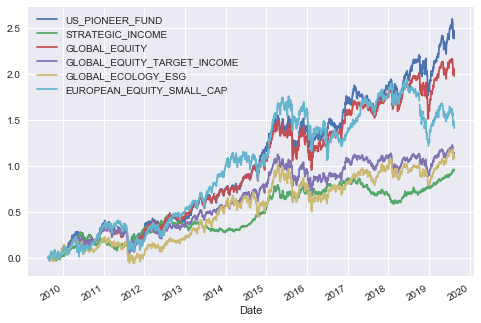

In [65]:
# Doublechecking reversly, if the returns are making similar shapes as prices alone.
plt.style.use('seaborn')
table_cum =((1+DF_COMPLETE_RETS).cumprod()-1).plot()
plt.gca().legend(asset_selection)

In [26]:
#annualising covarience from daily returns
cov_daily = returns_daily.cov().dropna()
cov_annual = (cov_daily * 250).round(4)

In [27]:
#Building correlation matrix from the returns
CorrelationMatrix = DF_COMPLETE_RETS.corr()
print(CorrelationMatrix)

                             US_PIONEER_FUND  STRATEGIC_INCOME  GLOBAL_EQUITY  \
US_PIONEER_FUND                     1.000000          0.272285       0.902854   
STRATEGIC_INCOME                    0.272285          1.000000       0.207949   
GLOBAL_EQUITY                       0.902854          0.207949       1.000000   
GLOBAL_EQUITY_TARGET_INCOME         0.860204          0.193469       0.936027   
GLOBAL_ECOLOGY_ESG                  0.799550          0.108915       0.878700   
EUROPEAN_EQUITY_SMALL_CAP           0.545380         -0.146880       0.714521   

                             GLOBAL_EQUITY_TARGET_INCOME  GLOBAL_ECOLOGY_ESG  \
US_PIONEER_FUND                                 0.860204            0.799550   
STRATEGIC_INCOME                                0.193469            0.108915   
GLOBAL_EQUITY                                   0.936027            0.878700   
GLOBAL_EQUITY_TARGET_INCOME                     1.000000            0.901915   
GLOBAL_ECOLOGY_ESG              

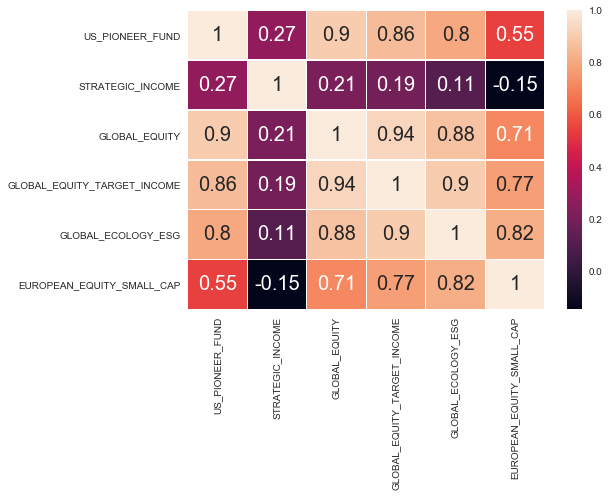

In [28]:
# We can see strong correlation between the funds that was expected because of their structures.
# They are either based on equity/Bond structures or purely bonds structures.
# Later on in the investment  process I would choose the ones with the best sharpe or lowest variance, and the lowest correlation.
sns.heatmap(CorrelationMatrix,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 20})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [29]:

# Lists to store portfolios 
port_returns = []
port_volatility = []
stock_weights = []
# The most needed attribute ( As one of the foremost calculations is made of Sharpe Ratio( And then Lowest Mea-Variance
# In Portfolio))
sharpe_ratio = []

num_assets = len(asset_selection)
num_portfolios = 50000
# Building imaginary portfolio, generating random seeds

# Portfolios generated into lists 
# This part might be better elaborated by creating the function for efficient frontier and for populating lists
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) 
    weights /= np.sum(weights)  
    returns = np.dot(weights,returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    sharpe_ratio.append(sharpe)
    # Accessing Risk and Returns
portfolio = {'Returns': port_returns,'Volatility': port_volatility}

for counter,symbol in enumerate(asset_selection):
    portfolio[symbol + 'Weight'] = [Weight[counter] for Weight in stock_weights]
    
# creating Dataframe 
df = pd.DataFrame(portfolio).round(4)
# Adjusting Column order  
column_order = ['Returns','Volatility'] + [stock + 'Weight' for stock in asset_selection]

df[column_order]

,Returns,Volatility,US_PIONEER_FUNDWeight,STRATEGIC_INCOMEWeight,GLOBAL_EQUITYWeight,GLOBAL_EQUITY_TARGET_INCOMEWeight,GLOBAL_ECOLOGY_ESGWeight,EUROPEAN_EQUITY_SMALL_CAPWeight
0,0.0728,0.0995,0.2084,0.1451,0.1840,0.1344,0.0770,0.2511
1,0.0694,0.0992,0.0536,0.1670,0.2165,0.1077,0.1167,0.3385
2,0.0789,0.1182,0.3344,0.0006,0.1072,0.0607,0.0970,0.4001
3,0.0783,0.1036,0.4219,0.1189,0.1206,0.1076,0.0125,0.2184
4,0.0740,0.1061,0.2796,0.0807,0.1022,0.1947,0.0884,0.2545
5,0.0692,0.0869,0.2314,0.3258,0.1639,0.0320,0.1765,0.0704
6,0.0690,0.0960,0.1356,0.1718,0.2197,0.2018,0.1646,0.1066
7,0.0697,0.1003,0.1293,0.1355,0.1920,0.1754,0.1771,0.1907
8,0.0713,0.1008,0.2987,0.1335,0.0382,0.2553,0.1221,0.1523
9,0.0729,0.1046,0.3909,0.0906,0.0154,0.3660,0.0774,0.0596


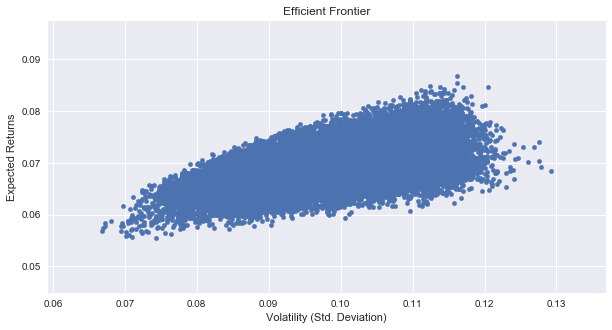

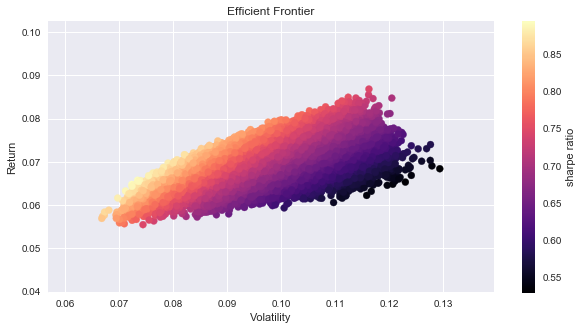

In [30]:
#Plotting scatter plots to visualize efficient frontier 
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10,5 ), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x=port_volatility, y=port_returns, c= sharpe_ratio, cmap='magma')
plt.colorbar(label='sharpe ratio')
sns.set(style='darkgrid')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [87]:
print('sharpe ratio %.f5' % sharpe_ratio.index(max(sharpe_ratio)))
MAXIMUM_SHARPE = stock_weights[sharpe_ratio.index(max(sharpe_ratio))]

sharpe ratio 36005


In [89]:
# Getting to know our MAX sharpe ratio 
max(sharpe_ratio).round(3) 

0.895

In [32]:
print(str(np.round(MAXIMUM_SHARPE, 3) * 100) + '%')
# converting the variance float into a percentage  
# for the best Risk/Reward Allocation
print(asset_selection)

[ 4.  49.6 39.3  0.8  1.   5.4]%
('US_PIONEER_FUND', 'STRATEGIC_INCOME', 'GLOBAL_EQUITY', 'GLOBAL_EQUITY_TARGET_INCOME', 'GLOBAL_ECOLOGY_ESG', 'EUROPEAN_EQUITY_SMALL_CAP')


In [33]:
LOWEST_VOLATILITY = stock_weights[port_volatility.index(min(port_volatility))]
print(str(np.round(LOWEST_VOLATILITY, 3) * 100) + '%')
#Lowest Risk Allocation
print(asset_selection)

[ 2.6 61.8  1.  17.8  0.7 16.2]%
('US_PIONEER_FUND', 'STRATEGIC_INCOME', 'GLOBAL_EQUITY', 'GLOBAL_EQUITY_TARGET_INCOME', 'GLOBAL_ECOLOGY_ESG', 'EUROPEAN_EQUITY_SMALL_CAP')


In [34]:
MAX_RETURN = stock_weights[port_returns.index(max(port_returns))]
print(str(np.round(MAX_RETURN, 3) * 100) + '%')
# For the BEST RETURN allocation
print(asset_selection)

[53.7  2.1 41.4  0.8  1.4  0.5]%
('US_PIONEER_FUND', 'STRATEGIC_INCOME', 'GLOBAL_EQUITY', 'GLOBAL_EQUITY_TARGET_INCOME', 'GLOBAL_ECOLOGY_ESG', 'EUROPEAN_EQUITY_SMALL_CAP')


In [35]:
# Making a copy of Dataframe to avoid mistakes
DF_NEW = DF_COMPLETE_RETS.copy()
DF_NEW.head()

,US_PIONEER_FUND,STRATEGIC_INCOME,GLOBAL_EQUITY,GLOBAL_EQUITY_TARGET_INCOME,GLOBAL_ECOLOGY_ESG,EUROPEAN_EQUITY_SMALL_CAP
Date,,,,,,
2009-08-22,NaN,NaN,NaN,NaN,NaN,NaN
2009-08-23,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-08-24,0.0062,0.002000,0.005400,0.013300,0.010100,0.016200
2009-08-25,0.0000,0.001198,0.002089,0.001974,-0.003762,0.001476
2009-08-26,0.0000,0.007476,0.003176,-0.000788,-0.007254,-0.007271


In [36]:
# Taking certain weighting from portfolio efficient frontier optimasation and visualising equity curve of portfolio 
# Multiplying returns to obtain performance of our portfolio
portfolio_weights_MAX_SHARPE = MAXIMUM_SHARPE
#print(portfolio_weights_MAX_SHARPE.sum())
RETURNS_MAX_SHARPE= DF_NEW.mul(portfolio_weights_MAX_SHARPE, axis=1).sum(axis=1) 
#Creating Cumulative performance, as we would't be able to plot it as a curve   
CumulativeReturns_MAX_SHARPE= ((1+RETURNS_MAX_SHARPE).cumprod()-1) 
#
portfolio_weights_LOW_VOL = LOWEST_VOLATILITY
RETURNS_LOW_VOL = DF_NEW.mul(portfolio_weights_LOW_VOL,axis=1).sum(axis=1)
CumulativeReturns_LOW_VOL = ((1+RETURNS_LOW_VOL).cumprod()-1)
#
portfolio_weights_MAX_RETURN = MAX_RETURN
RETURNS_MAX_RET = DF_NEW.mul(portfolio_weights_MAX_RETURN,axis=1).sum(axis=1)
CumulativeReturns_MAX_RET = ((1+RETURNS_MAX_RET).cumprod()-1)
#
# Equally weighted portfolio created by 1/NUM_FUNDS for equal weighting 
NUM_FUNDS = len(asset_selection)
portfolio_weights_EQUALLY_WEIGHTED = np.repeat(1/NUM_FUNDS,NUM_FUNDS)
RETURNS_EW = DF_NEW.mul(portfolio_weights_EQUALLY_WEIGHTED,axis=1).sum(axis=1)
CumulativeReturns_EW = ((1+RETURNS_EW).cumprod()-1)


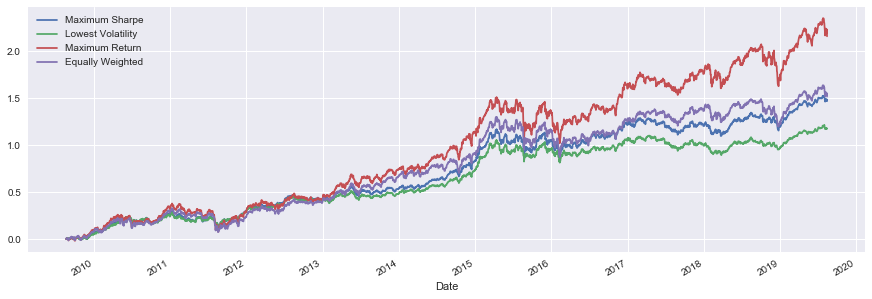

In [92]:
# Plotting Cumulative performance of our 4 portfolios 
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(15,5))
CumulativeReturns_MAX_SHARPE.plot()
CumulativeReturns_LOW_VOL.plot()
CumulativeReturns_MAX_RET.plot()
CumulativeReturns_EW.plot()
plt.gca().legend(('Maximum Sharpe','Lowest Volatility','Maximum Return','Equally Weighted' ))


In [38]:
# WE want to know the VAR and CVAR for portfolio with maximum Sharpe allocation
# That explains probabilities of worst case scenario in time  when portfolio is not  rebalanced or managed
# For the avoiding mistakes, every single var has it's own variable 
var_level_99 = 99 # Confidence level for calculation
var_99_MS = np.percentile(RETURNS_MAX_SHARPE, 100 - var_level_99)
cvar_99_MS = RETURNS_MAX_SHARPE[RETURNS_MAX_SHARPE <= var_99_MS].mean()

var_level_95 = 95# Confidence Level for calculation
var_95_MS = np.percentile(RETURNS_MAX_SHARPE, 100- var_level_95)
cvar_95_MS = RETURNS_MAX_SHARPE[RETURNS_MAX_SHARPE <= var_95_MS].mean()

# VAR Calculation for LOW_VOL portfolio 
var_level_99 = 99 # Confidence level for calculation
var_99_LW = np.percentile(RETURNS_LOW_VOL, 100 - var_level_99)
cvar_99_LW = RETURNS_LOW_VOL[RETURNS_LOW_VOL <= var_99_LW].mean()

var_level_95 = 95# Confidence level for calculation
var_95_LW = np.percentile(RETURNS_LOW_VOL, 100 - var_level_95)
cvar_95_LW = RETURNS_LOW_VOL[RETURNS_LOW_VOL <= var_95_LW].mean()

#

# VAR Calculation for MAX_RETURN portfolio 
var_level_99 = 99 # Confidence level for calculation

var_99_MR = np.percentile(RETURNS_MAX_RET, 100 - var_level_99)
cvar_99_MR = RETURNS_MAX_RET[RETURNS_MAX_RET <= var_99_MR].mean()

var_level_95 = 95# Confidence level for calculation
var_95_MR = np.percentile(RETURNS_MAX_RET, 100 - var_level_95)
cvar_95_MR = RETURNS_MAX_RET[RETURNS_MAX_RET <= var_95_MR].mean()

#
#RETURNS_Equally Weighted 
var_level_99 = 99 # Confidence level for calculation

var_99_EW = np.percentile(RETURNS_EW, 100 - var_level_99)
cvar_99_EW = RETURNS_EW[RETURNS_EW <= var_99_EW].mean()

var_level_95 = 95# Confidence level for calculation
var_95_EW = np.percentile(RETURNS_EW, 100 - var_level_95)
cvar_95_EW = RETURNS_EW[RETURNS_EW <= var_95_EW].mean()

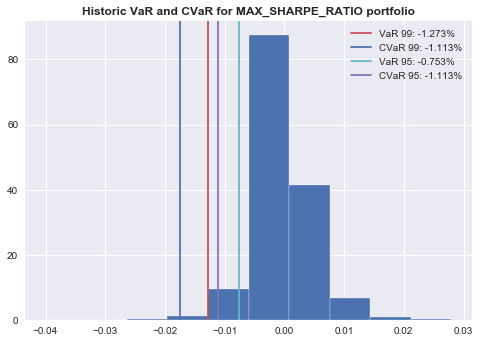

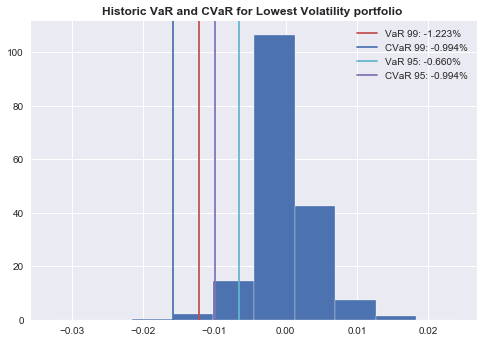

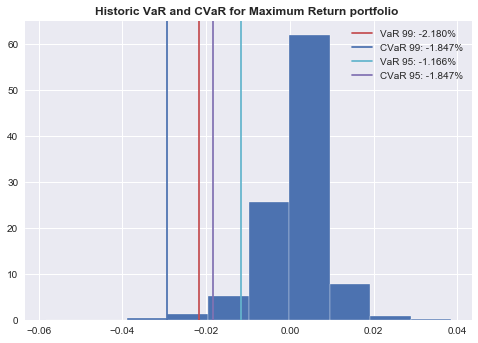

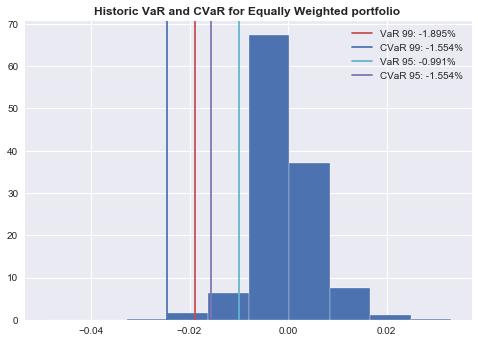

In [39]:
#MAX_SHARPE
plt.hist(RETURNS_MAX_SHARPE, density=True)
plt.title("Historic VaR and CVaR for MAX_SHARPE_RATIO portfolio", weight="bold");
plt.axvline(x=var_99_MS, color="r", linestyle="-", label='VaR 99: {0:.3f}%'.format(var_99_MS*100))
plt.axvline(x=cvar_99_MS, color='b', linestyle='-', label='CVaR 99: {0:.3f}%'.format(cvar_95_MS*100))
plt.axvline(x=var_95_MS, color='c', linestyle='-', label='VaR 95: {0:.3f}%'.format(var_95_MS*100))
plt.axvline(x=cvar_95_MS, color='m', linestyle='-', label='CVaR 95: {0:.3f}%'.format(cvar_95_MS*100))

plt.legend()
plt.show()

plt.hist(RETURNS_LOW_VOL, density=True)
plt.title("Historic VaR and CVaR for Lowest Volatility portfolio ", weight="bold");
plt.axvline(x=var_99_LW, color="r", linestyle="-", label='VaR 99: {0:.3f}%'.format(var_99_LW*100))
plt.axvline(x=cvar_99_LW, color='b', linestyle='-', label='CVaR 99: {0:.3f}%'.format(cvar_95_LW*100))
plt.axvline(x=var_95_LW, color='c', linestyle='-', label='VaR 95: {0:.3f}%'.format(var_95_LW*100))
plt.axvline(x=cvar_95_LW, color='m', linestyle='-', label='CVaR 95: {0:.3f}%'.format(cvar_95_LW*100))

plt.legend()
plt.show()
#
#MAX RETURN
plt.hist(RETURNS_MAX_RET, density=True)
plt.title("Historic VaR and CVaR for Maximum Return portfolio ", weight="bold");
plt.axvline(x=var_99_MR, color="r", linestyle="-", label='VaR 99: {0:.3f}%'.format(var_99_MR*100))
plt.axvline(x=cvar_99_MR, color='b', linestyle='-', label='CVaR 99: {0:.3f}%'.format(cvar_95_MR*100))
plt.axvline(x=var_95_MR, color='c', linestyle='-', label='VaR 95: {0:.3f}%'.format(var_95_MR*100))
plt.axvline(x=cvar_95_MR, color='m', linestyle='-', label='CVaR 95: {0:.3f}%'.format(cvar_95_MR*100))

plt.legend()
plt.show()

#Equally Weighted 
plt.hist(RETURNS_EW, density=True)
plt.title("Historic VaR and CVaR for Equally Weighted portfolio ", weight="bold");
plt.axvline(x=var_99_EW, color="r", linestyle="-", label='VaR 99: {0:.3f}%'.format(var_99_EW*100))
plt.axvline(x=cvar_99_EW, color='b', linestyle='-', label='CVaR 99: {0:.3f}%'.format(cvar_95_EW*100))
plt.axvline(x=var_95_EW, color='c', linestyle='-', label='VaR 95: {0:.3f}%'.format(var_95_EW*100))
plt.axvline(x=cvar_95_EW, color='m', linestyle='-', label='CVaR 95: {0:.3f}%'.format(cvar_95_EW*100))

plt.legend()
plt.show()

# We can say , with 99% certainty, that portfolio Maximum Sharpe Ratio won't loose more than -1,273% in a given day 
# While non managed, or rebalanced.

In [40]:
# Graphically explained maximum drawdowns of the portfolios
DRAWDOWNS_MAX_SHARPE = CumulativeReturns_MAX_SHARPE
roll_max_1 = DRAWDOWNS_MAX_SHARPE.rolling(min_periods=1,window=250).max()
daily_drawdown_1 = DRAWDOWNS_MAX_SHARPE/roll_max_1 - 1.0
max_daily_drawdown = daily_drawdown_1.rolling(min_periods=1,window=250).min()
#
DRAWDOWNS_MAX_RET =CumulativeReturns_MAX_RET
roll_max_2 = DRAWDOWNS_MAX_RET.rolling(min_periods=1,window=250).max()
daily_drawdown_2 = DRAWDOWNS_MAX_RET/roll_max_2 - 1.0
max_daily_drawdown_2 = daily_drawdown_2.rolling(min_periods=1,window=250).min()
#
DRAWDOWNS_LOW_VOL =CumulativeReturns_LOW_VOL
roll_max_3 = DRAWDOWNS_LOW_VOL.rolling(min_periods=1,window=250).max()
daily_drawdown_3 = DRAWDOWNS_LOW_VOL/roll_max_3 - 1.0
max_daily_drawdown_3 = daily_drawdown_3.rolling(min_periods=1,window=250).min()
#
DRAWDOWNS_EW = CumulativeReturns_EW
roll_max_4 = DRAWDOWNS_EW.rolling(min_periods=1,window=250).max()
daily_drawdown_4 = DRAWDOWNS_EW/roll_max_4 - 1.0
max_daily_drawdown_4 = daily_drawdown_4.rolling(min_periods=1,window=250).min()
#

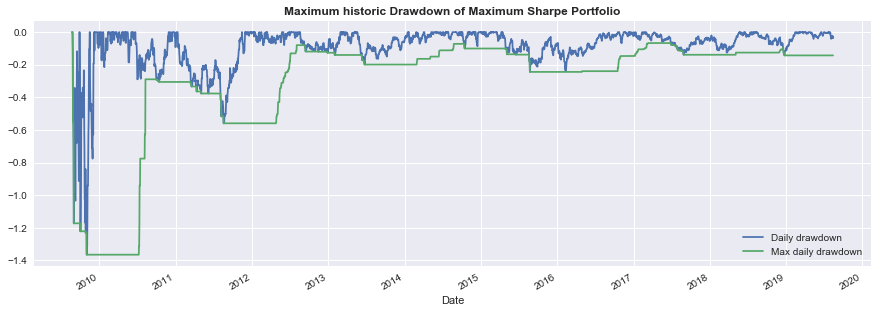

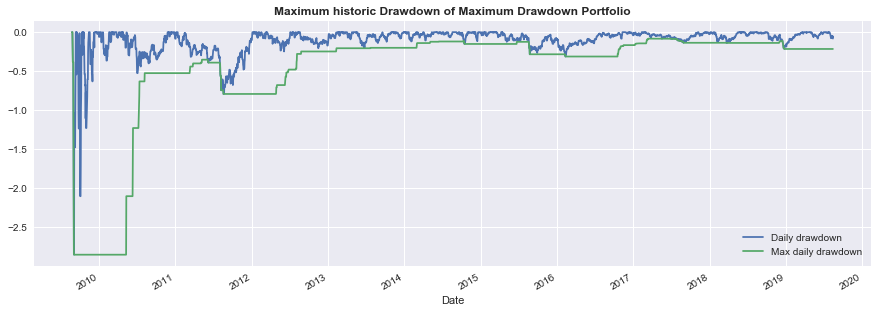

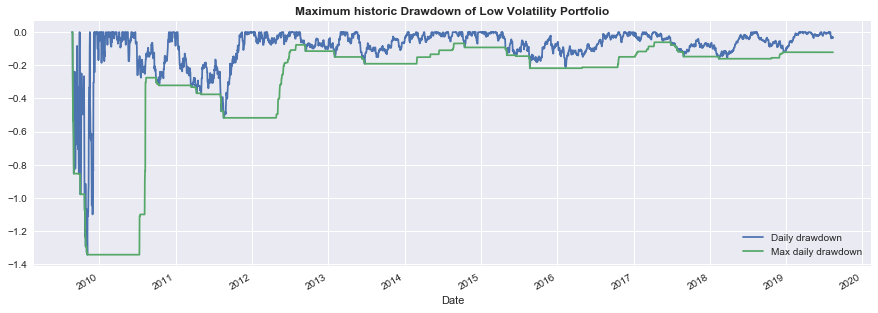

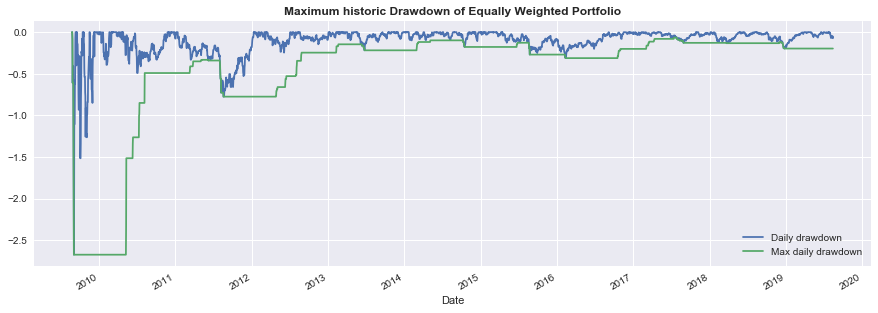

In [79]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Maximum historic Drawdown of Maximum Sharpe Portfolio", weight="bold");
daily_drawdown_1.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown.plot(ax=ax, label='Max daily drawdown')
ax.legend()
#
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Maximum historic Drawdown of Maximum Drawdown Portfolio", weight="bold");
daily_drawdown_2.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_2.plot(ax=ax, label='Max daily drawdown')
ax.legend()
#
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Maximum historic Drawdown of Low Volatility Portfolio", weight="bold");
daily_drawdown_3.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_3.plot(ax=ax, label='Max daily drawdown')
ax.legend()
#
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Maximum historic Drawdown of Equally Weighted Portfolio", weight="bold");
daily_drawdown_4.plot(ax=ax, label='Daily drawdown')
max_daily_drawdown_4.plot(ax=ax, label='Max daily drawdown')
ax.legend()